In [60]:
import signal_ana as ana
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
use_wf = True
use_lpc = True
use_amp = True

In [119]:
# Load the signals
df = ana.load_signals('features_30.h5')

In [120]:
df.head()

,time,waveform,lpc_coeff,amplitude
0,2019-05-27 18:16:37+00:00,"[3.72132730069, -51.1812948272, -104.97754986,...","[1.0, -2.18162593255, 2.49176485988, -1.993432...","[0.390425590627, 0.366654576689, 0.33067666624..."
1,2019-05-27 17:31:45+00:00,"[267.286223554, 213.095748702, 156.62064283, 9...","[1.0, -1.91957893956, 1.75126094982, -1.247919...","[0.304056059595, 0.328030528642, 0.44393763535..."
2,2019-05-27 17:17:41+00:00,"[-150.572442193, -248.678406427, -332.00272918...","[1.0, -2.23007592873, 2.50516095499, -2.071459...","[0.661311999342, 0.584146916956, 0.42782305131..."
3,2019-05-27 19:23:49+00:00,"[-220.99252159, -347.395354446, -449.371607879...","[1.0, -2.32914670106, 2.68123537773, -2.092240...","[0.382224472907, 0.586558602969, 0.38374742891..."
4,2019-05-27 20:41:11+00:00,"[157.167620135, 286.219708967, 395.840778773, ...","[1.0, -2.38909167965, 2.78044991558, -2.351892...","[0.430395495412, 0.381969445864, 0.41658439725..."


In [121]:
# Scale to zero mean and unit variance
ana.normalize(df, 'waveform')
ana.normalize(df, 'lpc_coeff')
ana.normalize(df, 'amplitude')

In [122]:
# Exclude the eruption days
eruption_days = [ ('2019-07-03', '2019-07-04'), ('2019-08-28', '2019-08-29'), ('2019-08-29', '2019-08-30')]
df = ana.exclude_days(df, eruption_days)

In [5]:
# Select a test period
df_test = ana.test_period(df)

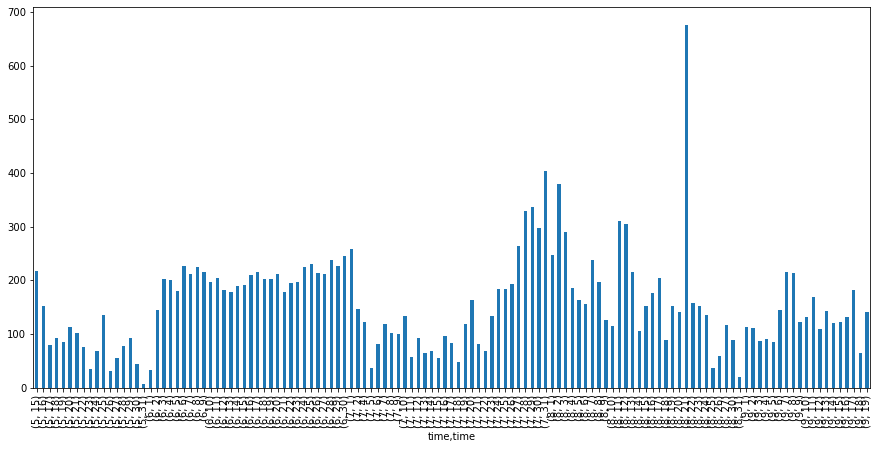

In [123]:
# Frequency of signals per day
ana.plot_freq(df)

In [125]:
features = ana.get_features(df, wf = use_wf, lpc=use_lpc, amp=use_amp)

In [143]:
# Train som
size = 12
niter = 20000 #10000
sigma = 1.23 # #0.3
learning_rate= .04 #.5
pca=False
random_seed = 2

0.344481294925
0.330608277829
0.320624962434
0.311210807092
0.305964034569
0.300814482755
0.296120599918
0.290359524155
0.285881151142
0.281739060712
0.27705473741
0.274428763773
0.271440833048
0.268394083982
0.265324297949
0.262585069036
0.260260900706
0.258376445522
0.256327489382
0.254366057383


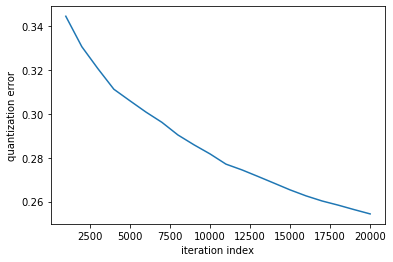

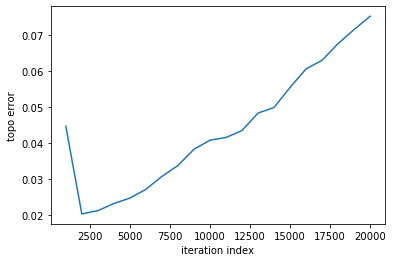

In [147]:
som = ana.run_som(features, size, niter = niter, sigma=sigma, learning_rate=learning_rate, 
                  pca=pca, plot_error = True, random_seed = random_seed)

In [145]:
from skopt.space import Real, Categorical, Integer

# Skopt dimensions
skopt_dims = [       
    Real(        low=1e-2, high=1,     prior='log-uniform', name='learning_rate'     ),
    Real(        low=.1,    high=5,                         name='sigma'     ),
    Real(     low=1e2,    high=1e5,   prior='log-uniform', name='niter'       )
]

# Initial parameters
init_param = {'learning_rate':0.5, 'sigma':0.3, 'niter' : 10000}

search_result = ana.optimize(skopt_dims, init_param, features, size, num_calls=20, pca = pca, random_seed = random_seed)

learning_rate
sigma
niter

 	 ::: 1 SKOPT CALL ::: 

{'learning_rate': 0.5, 'sigma': 0.3, 'niter': 10000}
0.245254147521
0.838262102491
0.8734030852644018

 	 ::: 2 SKOPT CALL ::: 

{'learning_rate': 0.072792476187902785, 'sigma': 4.2170353283266735, 'niter': 269.87934995979492}
0.435832172827
0.2485821349
0.5017397339884488

 	 ::: 3 SKOPT CALL ::: 

{'learning_rate': 0.92867459976999966, 'sigma': 2.9123066582833639, 'niter': 96113.005586385218}
0.342395920009
0.0475491188981
0.3456817680280621

 	 ::: 4 SKOPT CALL ::: 

{'learning_rate': 0.052572234020321636, 'sigma': 3.1562382207963235, 'niter': 727.83369244248922}
0.403715716326
0.0483593275268
0.40660177590320656

 	 ::: 5 SKOPT CALL ::: 

{'learning_rate': 0.22822505618753472, 'sigma': 2.9607891432631162, 'niter': 1157.4074743733697}
0.372704985065
0.0150901357099
0.37301034581915543

 	 ::: 6 SKOPT CALL ::: 

{'learning_rate': 0.055014440667400168, 'sigma': 1.8995369558652566, 'niter': 351.60320733811352}
0.347653516855
0.693487

In [146]:
search_result

,call,learning_rate,sigma,niter,score,q_error,t_error
0,13,0.010000,2.851728,100000.000000,0.314599,0.314518,0.007140
1,16,1.000000,2.644730,100000.000000,0.335761,0.331040,0.056107
2,12,0.010000,3.755887,100000.000000,0.337842,0.337829,0.002988
3,9,0.033468,3.942411,96455.603306,0.341548,0.341531,0.003443
4,2,0.928675,2.912307,96113.005586,0.345682,0.342396,0.047549
5,19,0.010000,3.565061,10134.985648,0.351301,0.351300,0.001013
6,15,0.010000,5.000000,100000.000000,0.363531,0.363521,0.002734
7,11,1.000000,3.652393,100000.000000,0.366809,0.365746,0.027902
8,4,0.228225,2.960789,1157.407474,0.373010,0.372705,0.015090
9,14,1.000000,5.000000,100000.000000,0.397689,0.397452,0.013723


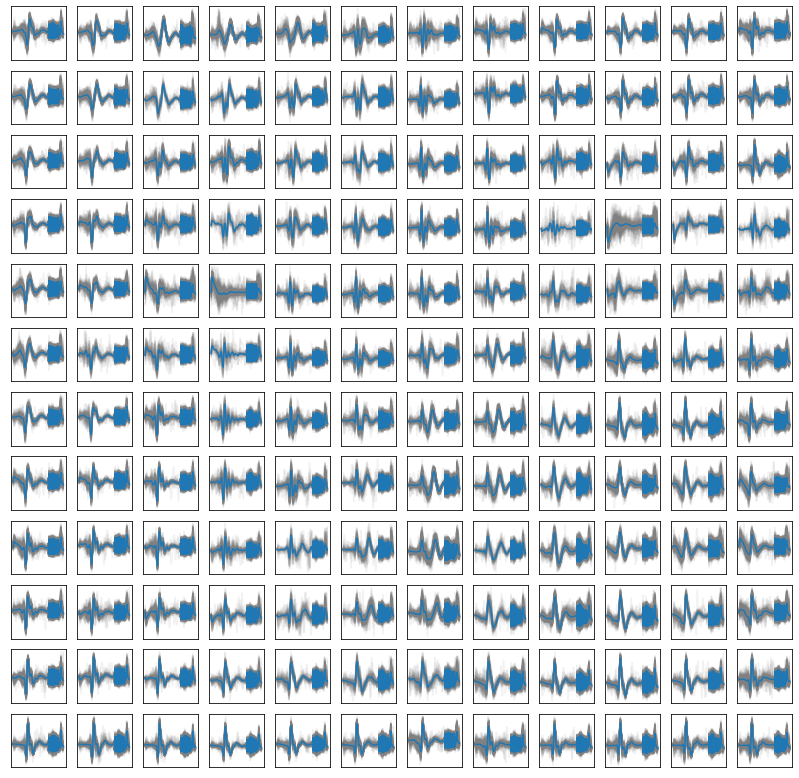

In [148]:
ana.plot_waveforms(features, som, size )

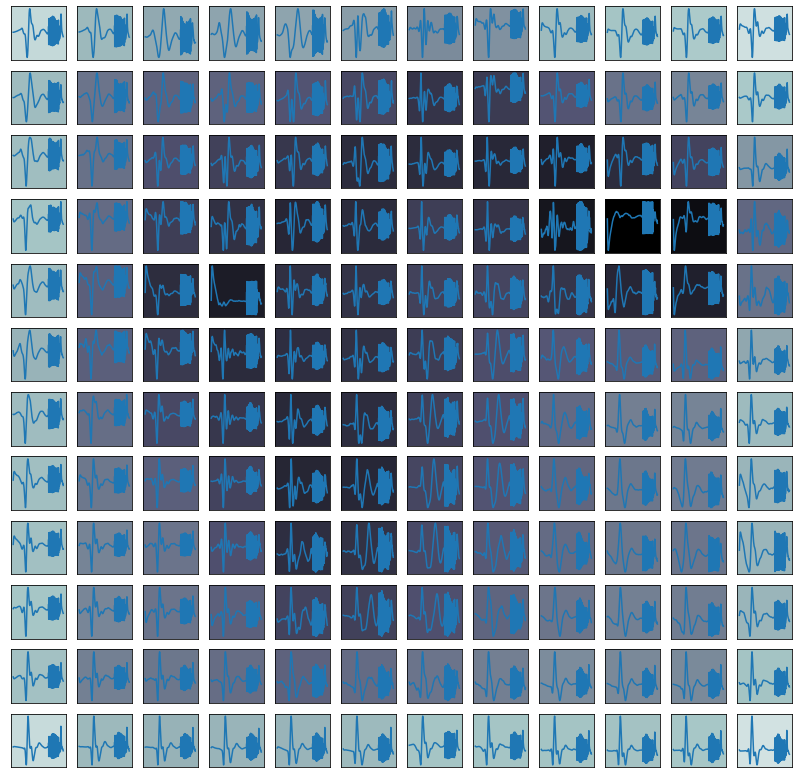

In [149]:
ana.plot_dmap(features, som, size)

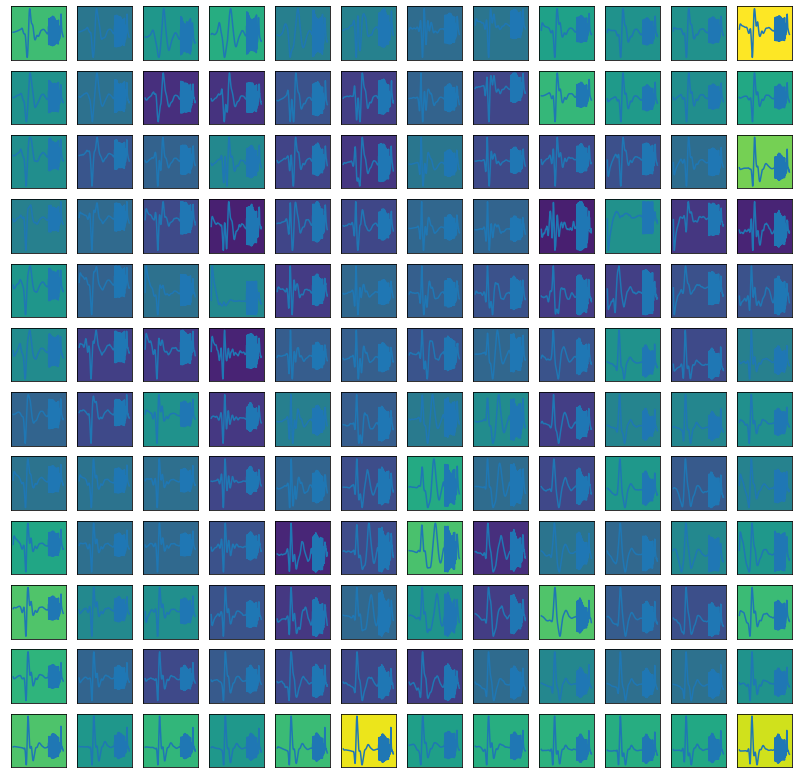

In [150]:
ana.plot_density(features, som, size )

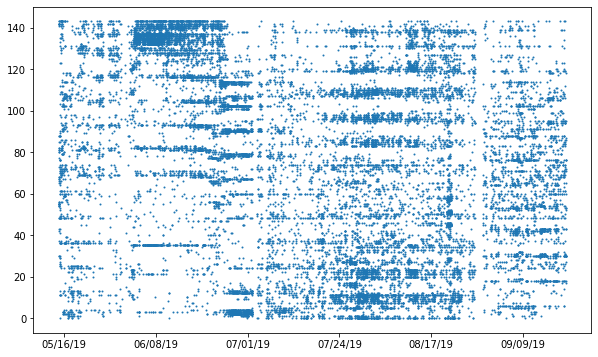

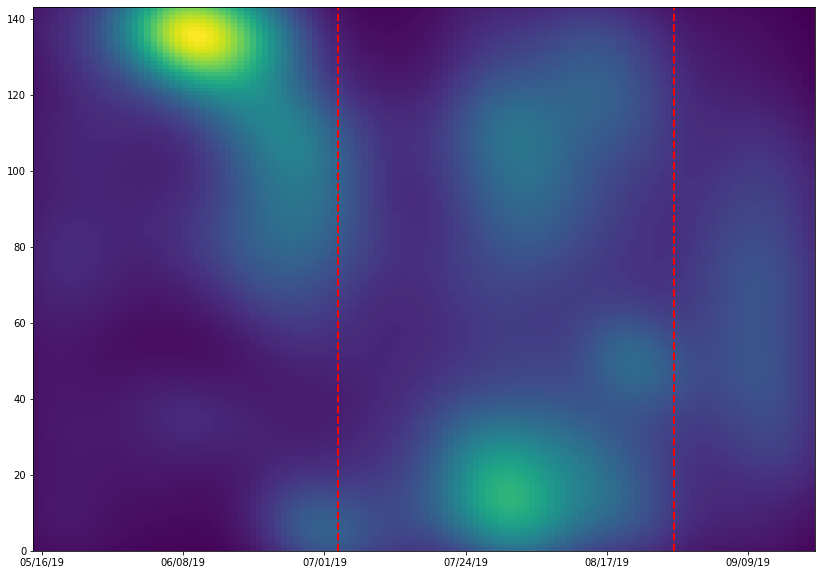

In [151]:
ana.plot_evo(df, som, size, wf = use_wf, lpc = use_lpc, amp = use_amp)